In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [32]:
import pandas as pd

In [23]:
import pytesseract
from pytesseract import Output

In [71]:
text_path = './textlines/1_1_1/1_1_1_l11/1_1_1_l11.jpg'

In [72]:
text_img = cv2.imread(text_path)

>> ÏIRÀNG 2


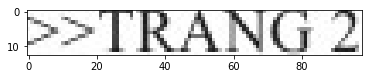

In [73]:
plt.imshow(text_img)
print(pytesseract.image_to_string(text_img, lang='vie', config='--psm 7 --oem 1'))

In [74]:
data = pytesseract.image_to_data(text_img, lang='vie', config='--psm 7 --oem 1 tsv', output_type=Output.DATAFRAME)

In [75]:
list_words = [] 
for index, row in data[data["conf"] > 0].iterrows():
    coordinate_word = {}
    word_data = {}
    coordinate_word['x'] = row['left']
    coordinate_word['y'] = row['top']
    coordinate_word['w'] = row['width']
    coordinate_word['h'] = row['height']
    
    word_data['word'] = row['text']
    word_data['coordinate'] = coordinate_word
    
    list_words.append(word_data)

In [76]:
for item in list_words:
    print(item)

{'word': '>>', 'coordinate': {'x': 0, 'y': 2, 'w': 19, 'h': 8}}
{'word': 'ÏIRÀNG', 'coordinate': {'x': 23, 'y': 0, 'w': 57, 'h': 13}}
{'word': '2', 'coordinate': {'x': 89, 'y': 0, 'w': 8, 'h': 12}}


In [38]:
gray = cv2.cvtColor(text_img, cv2.COLOR_BGR2GRAY)

3 thang Mười hai năm Bình Thân


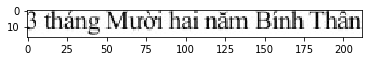

In [39]:
plt.imshow(gray, cmap='gray')
print(pytesseract.image_to_string(gray, lang='vie', config='--psm 7 --oem 1'))

In [40]:
thresh_gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

3 thang Mười hai nñäăm Bình 1T hân


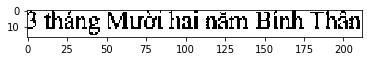

In [41]:
plt.imshow(thresh_gray, cmap='gray')
print(pytesseract.image_to_string(thresh_gray, lang='vie', config='--psm 7 --oem 1'))

In [42]:
blur_gray = cv2.medianBlur(gray, 3)

‡ thang Munn hại nằm: Hành Í haớ


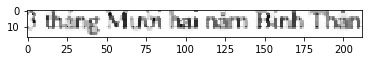

In [55]:
plt.imshow(blur_gray, cmap='gray')
print(pytesseract.image_to_string(blur_gray, lang='vie', config='--psm 7 --oem 1'))

In [84]:
retval, threshold_img = cv2.threshold(gray, 210, 255, cv2.THRESH_BINARY)

3 thang Mười hai năm Bình Thân


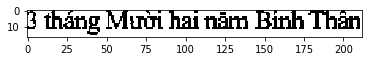

In [85]:
plt.imshow(threshold_img, cmap='gray')
print(pytesseract.image_to_string(threshold_img, lang='vie', config='--psm 7 --oem 1'))

In [63]:
gray

array([[255, 228, 159, ..., 252, 255, 255],
       [195,  76, 104, ..., 255, 253, 253],
       [151, 254, 252, ..., 252, 255, 253],
       ...,
       [254, 255, 252, ..., 255, 252, 255],
       [252, 253, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [91]:
text_a = '3 thang Mười hai năm Bình Thân'
text_b = '3 thang Mười hai năm Bình Thân'

In [92]:
if text_a == text_b:
    print('matching')
else:
    print('Not matching')

matching


In [93]:
id(text_a)

2506489380912

In [94]:
id(text_b)

2506489381064

In [97]:
list_words =text_a.split()

In [98]:
list_words

['3', 'thang', 'Mười', 'hai', 'năm', 'Bình', 'Thân']